# Fundamentos de procesamiento digital de imágenes

### Prof. Arturo González Vega
### Alumna: Salma Patricia Gutiérrez Rivera

## Segundo examen parcial

__1. Haga una función llamada ImPotencia que, dada una imagen, calcule su potencia promedio. Para realizar el cálculo utilice el teorema de Parseval que dice lo siguiente:__

$$
P_f = \frac{1}{MN}\sum_u\sum_v|F(u,v)|^2
$$

In [8]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from math import exp

In [73]:
def imagen_dft(imagen):
    """Esta función solo sirve con imágenes BGR,
    aunque sean a escala de grises. Usa cv2.imread(imagen, 0)"""
    dft = cv2.dft(np.float32(imagen), flags = cv2.DFT_COMPLEX_OUTPUT) # Transformada de la imagen
    dft_shift = np.fft.fftshift(dft) # Centramos la transformada
    magnitud = cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]) # Magnitud del espectro
    # Regresar a imagen int
    cota = 20 * np.log(magnitud)
    img_transf = 255 * cota / np.max(cota)
    img_transf = img_transf.astype(np.uint8)
    
    return img_transf

In [12]:
def ImPotencia(espectro):
    M, N = espectro.shape
    potencia = np.sum(espectro * espectro) / (M * N)
    
    return potencia

__2. Haga una función FiltraGaussiana que, dada una imagen, el tipo de filtro (pasabajos o pasaaltos) y el valor de $\sigma$, realice un filtrado con una función Gaussiana con la desviación indicada.__

In [91]:
def kernel_gaussiano(P, Q, sigma, pasa = 0):
    """pasa = 0 es pasabajos. pasa = 1 es pasaaltos. No me hago responsable del resto"""
    kernel = np.zeros((P, Q))
    
    for u in range(P):
        for v in range(Q):
            D_cuadrada = (u - 0.5 * P)**2 + (v - 0.5 * Q)**2
            kernel[u][v] = pasa + (-1)**pasa * exp(- 0.5 * D_cuadrada / sigma**2)
                
    return kernel

In [92]:
def FiltraGaussiana(imagen, sigma, pasa = 0):
    P, Q = imagen.shape
    kernel = kernel_gaussiano(P, Q, sigma, pasa)
    img_transf = np.fft.fftshift(np.fft.fft2(imagen))
    aplico_filtro = kernel * img_transf
    img_filtrada = np.real(np.fft.ifft2(np.fft.ifftshift(aplico_filtro)))
    
    return img_filtrada

__3. Utilizando las dos funciones anteriores y la imagen I FigP0401(test_pattern).tif:__

__a)__ Calcule y reporte el valor de la potencia promedio $P_I$ de la imagen.

In [74]:
img1 = cv2.imread('FigP0401(test_pattern).tif', 0)
img1_dft = imagen_dft(img1)
img1_potencia = ImPotencia(img1_dft)

In [34]:
print("La potencia de la imagen es", img1_potencia)

La potencia de la imagen es 11998180119.937023


__b)__ Para σ = 16, aplique un filtro pasabajos a la imagen I. Guarde la imagen en IB. Calcule la potencia a IB.

In [99]:
IB = FiltraGaussiana(img1, 16.0)

In [103]:
IB_potencia = ImPotencia(img1_dft)

print("La potencia de IB es", IB_potencia)

La potencia de IB es 74.50892


Text(0.5, 1.0, 'Filtro pasabajos')

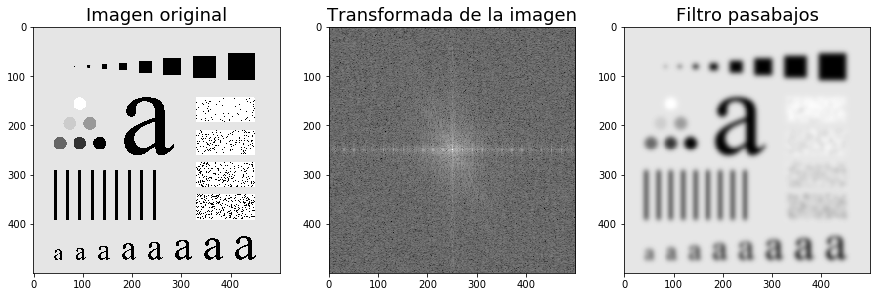

In [101]:
fig = plt.figure(figsize = (15, 10))
fig.add_subplot(1, 3, 1)
plt.imshow(img1, cmap = 'gray')
plt.title('Imagen original', size = 18)
fig.add_subplot(1, 3, 2)
plt.imshow(img1_dft, cmap = 'gray')
plt.title('Transformada de la imagen', size = 18)
fig.add_subplot(1, 3, 3)
plt.imshow(IB, cmap = 'gray')
plt.title('Filtro pasabajos', size = 18)

__c)__ Para σ = 16, aplique un filtro pasaaltos a la imagen I. Guarde la imagen en IA. Calcule la potencia a IA.

In [97]:
IA = FiltraGaussiana(img1, 16.0, 1)

In [105]:
IA_dft = imagen_dft(IA)
IA_potencia = ImPotencia(IA_dft)

print("La potencia de IA es", IA_potencia)

La potencia de IA es 119.301868


Text(0.5, 1.0, 'Filtro pasaaltos')

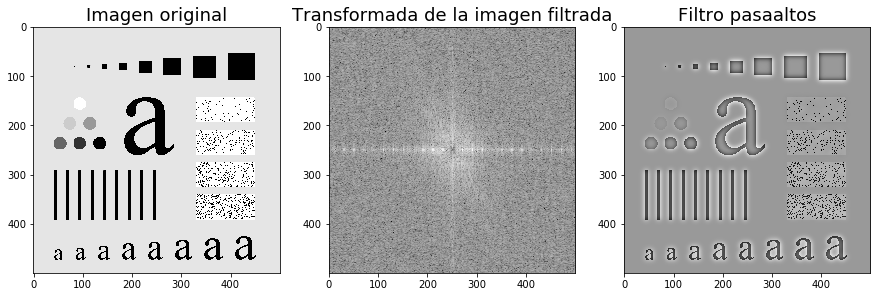

In [106]:
fig = plt.figure(figsize = (15, 10))
fig.add_subplot(1, 3, 1)
plt.imshow(img1, cmap = 'gray')
plt.title('Imagen original', size = 18)
fig.add_subplot(1, 3, 2)
plt.imshow(IA_dft, cmap = 'gray')
plt.title('Transformada de la imagen filtrada', size = 18)
fig.add_subplot(1, 3, 3)
plt.imshow(IA, cmap = 'gray')
plt.title('Filtro pasaaltos', size = 18)

__d)__ ¿Por qué la potencia de IA es muy diferente a la de IB?

__RESPUESTA:__ Porque IA tiene muchas más frecuencias altas que IB, lo que implica que la suma de las frecuencias es menor para IB.